# Engineering Mathematics Computer Assignment

# Imports

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Part 1: Discrete Fourier Series in 1D

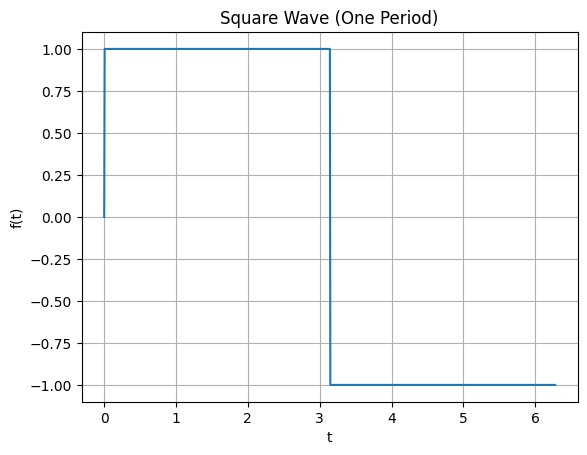

In [44]:
N = 1000 
T = 2 * np.pi
x = np.linspace(0, T, N, endpoint=False)
y = np.sign(np.sin(2 * np.pi * x / T))

plt.plot(x, y)
plt.title('Square Wave (One Period)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.show()

In [45]:
def discrete_fourier_series(f, N, n):
    T = 2 * np.pi
    t = np.linspace(0, T, N, endpoint=False)
    dt = T / N 

    if n == 0:
        a_0 = (1 / T) * np.sum(f) * dt
        return a_0, 0

    a_n = (2 / T) * np.sum(f * np.cos(2 * np.pi * n * t / T)) * dt
    b_n = (2 / T) * np.sum(f * np.sin(2 * np.pi * n * t / T)) * dt
    return a_n, b_n

> **Expected Output**   

For a square wave, the theoretical Fourier coefficients are:
- $ a_0 = 0 $ (since the square wave is symmetric around 0).
- $ a_n = 0 $ for all n (since the square wave is odd).
- $ b_n = \frac{4}{\pi n} $ for odd n, and b_n = 0 for even n.

Running the code should give (approximately, due to numerical precision):
- $ a_0 \approx 0 $
- $ a_1 \approx 0 $, $ b_1 \approx \frac{4}{\pi} \approx 1.2732 $
- $ a_2 \approx 0 $, $ b_2 \approx 0 $
- $ a_3 \approx 0 $, $ b_3 \approx \frac{4}{3\pi} \approx 0.4244 $

In [46]:
a_0, _ = discrete_fourier_series(y, N, 0)
a_1, b_1 = discrete_fourier_series(y, N, 1)
a_2, b_2 = discrete_fourier_series(y, N, 2)
a_3, b_3 = discrete_fourier_series(y, N, 3)

print(f"a_0: {a_0:.4f}")
print(f"a_1: {a_1:.4f}, b_1: {b_1:.4f}")
print(f"a_2: {a_2:.4f}, b_2: {b_2:.4f}")
print(f"a_3: {a_3:.4f}, b_3: {b_3:.4f}")

a_0: 0.0010
a_1: -0.0020, b_1: 1.2732
a_2: 0.0020, b_2: 0.0000
a_3: -0.0020, b_3: 0.4244


In [47]:
def reconstruct_function(num_terms):
    x_recon = np.linspace(0, T, N, endpoint=False)
    y_recon = []

    a_0, _ = discrete_fourier_series(y, N, 0)

    for t in x_recon:
        f_t = a_0 / 2
        for n in range(1, num_terms + 1):
            a_n, b_n = discrete_fourier_series(y, N, n)
            f_t += a_n * np.cos(2 * np.pi * n * t / T) + b_n * np.sin(2 * np.pi * n * t / T)
        y_recon.append(f_t)

    return y_recon

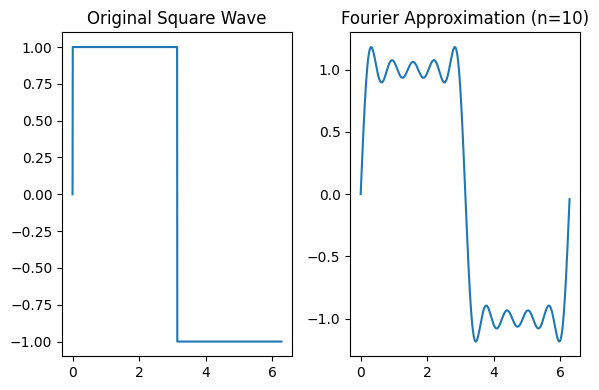

In [48]:
num_terms = 10  # Example for single plot
y_recon = reconstruct_function(num_terms)
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title('Original Square Wave')
plt.subplot(1, 2, 2)
x_plot = x
plt.plot(x_plot, y_recon)
plt.title(f'Fourier Approximation (n={num_terms})')
plt.tight_layout()
plt.show()

Loss n = 2: MSE = 0.188431
Loss n = 5: MSE = 0.065950
Loss n = 50: MSE = 0.007137


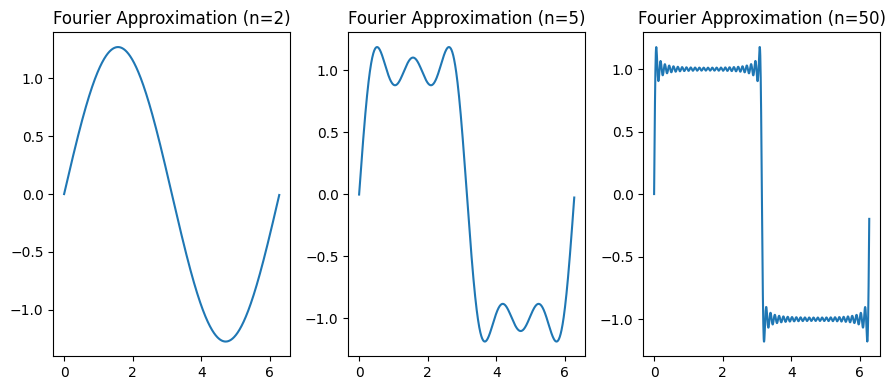

In [49]:
num_terms = [2, 5, 50]
resolution = 100
plt.figure(figsize=(3*len(num_terms), 4))

for i, num in enumerate(num_terms):
    plt.subplot(1, len(num_terms), i+1)
    y_recon = reconstruct_function(num) 
    x_plot = x
    plt.plot(x_plot, y_recon)
    plt.title(f"Fourier Approximation (n={num})")
    plt.tight_layout()

    mse = mean_squared_error(y, y_recon)
    print(f"Loss n = {num}: MSE = {mse:.6f}")

plt.show()

# Part 2: Discrete Fourier Series in 2D

## Grayscale image

In [73]:
def load_grayscale_image(path, width, height):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE) / 255.0
    image = cv2.resize(image, dsize=(width, height), interpolation=cv2.INTER_CUBIC)
    return image

In [ ]:
# ------------------------------------Generating a 64x64 grayscale image----------------------------------------
def create_synthetic_color_image(width, height):
    image = np.zeros((width, height, 3))  
    square_size = 20
    start = (width - square_size) // 2
    end = start + square_size
    third = square_size // 3
    image[start:end, start:start+third, 0] = 1.0  # Red
    image[start:end, start+third:start+2*third, 1] = 1.0  # Green
    image[start:end, start+2*third:end, 2] = 1.0  # Blue
    return image

image = create_synthetic_color_image(64, 64)
image_save = (image * 255).astype(np.uint8)
cv2.imwrite('synthetic_image.png', image_save)
# ---------------------------------------------------------------------------------------------------------------

True

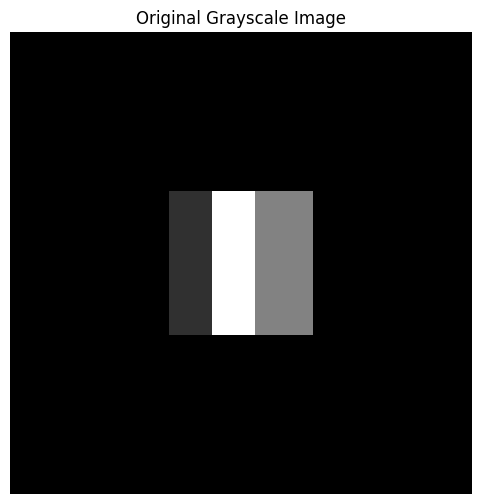

In [75]:
PATH = "synthetic_image.png"
image = load_grayscale_image(PATH, 64, 64)


plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

In [76]:
def dft2d(image):
    M, N = image.shape
    output = np.zeros((M, N), dtype=np.complex128)
    for k in range(M):
        for l in range(N):
            sum_val = 0.0
            for m in range(M):
                for n in range(N):
                    sum_val += image[m, n] * np.exp(-2j * np.pi * ((k * m / M) + (l * n / N)))
            output[k, l] = sum_val
    return output

def idft2d(image):
    M, N = image.shape
    output = np.zeros((M, N), dtype=np.complex128)
    for m in range(M):
        for n in range(N):
            sum_val = 0.0
            for k in range(M):
                for l in range(N):
                    sum_val += image[k, l] * np.exp(2j * np.pi * ((k * m / M) + (l * n / N)))
            output[m, n] = sum_val / (M * N)
    return output

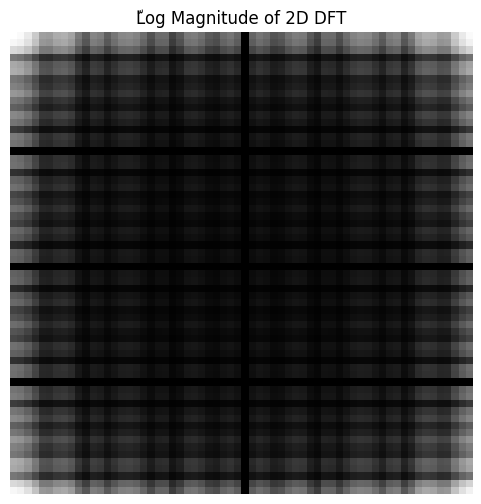

In [77]:
F = dft2d(image)

plt.figure(figsize=(15, 6))
log_magnitude_dft = np.log(1 + np.abs(F))

plt.imshow(log_magnitude_dft, cmap='gray')
plt.title('ّLog Magnitude of 2D DFT')
plt.axis('off')
plt.show()

**Which Coefficients to Keep?**

In the 2D Fourier transform, the coefficients $ F[k, l] $ represent frequencies, with $ (k, l) = (0, 0) $ being the DC component (average intensity) and larger $ |k|, |l| $ corresponding to higher frequencies. Low-frequency coefficients (near $ k=0, l=0 $) capture the image’s main structure, while high-frequency coefficients (far from the center) capture fine details and noise. To maximize reconstruction quality, we should keep coefficients with the largest magnitudes, which are typically low-frequency ones near the center of the 2D DFT matrix.

In [78]:
def compress_image(F, fraction):
    rows, cols = F.shape
    compressed_F = F.copy() 
    magnitudes = np.abs(F).flatten()
    threshold = np.percentile(magnitudes, 100 * (1 - fraction))
    mask = np.abs(compressed_F) < threshold
    compressed_F[mask] = 0
    return compressed_F

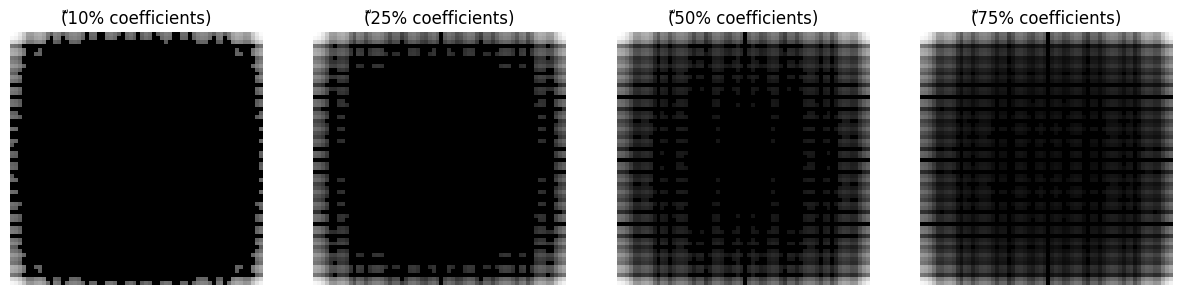

In [79]:
fractions = [0.1, 0.25, 0.5, 0.75]
plt.figure(figsize=(15, 6))

for i, frac in enumerate(fractions):
    plt.subplot(1, len(fractions), i + 1)
    
    compressed_F = compress_image(F, frac)
    log_magnitude_dft = np.log(1 + np.abs(compressed_F))
    
    plt.imshow(log_magnitude_dft, cmap='gray')
    plt.title(f'ّ({frac *100:.0f}% coefficients)')
    plt.axis('off')
    
plt.show()

Loss (25% coefficients): MSE = 0.0000502
Loss (50% coefficients): MSE = 0.0000090
Loss (75% coefficients): MSE = 0.0000010
Loss (100% coefficients): MSE = 0.0000000


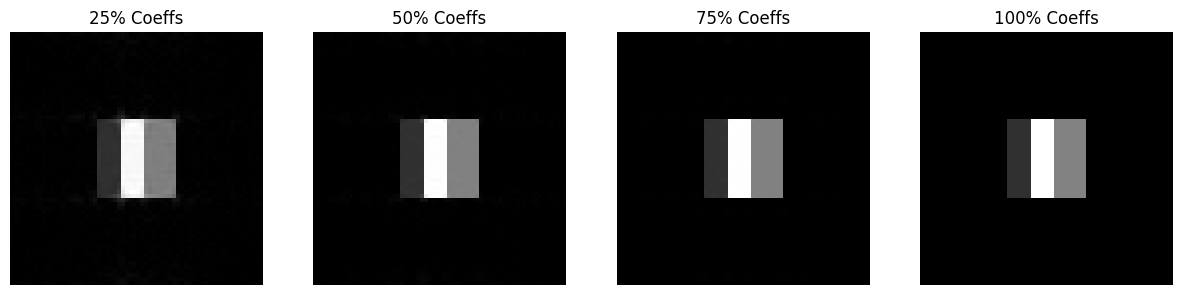

In [ ]:
fractions = [0.25, 0.5, 0.75, 1.0]
plt.figure(figsize=(15, 6))

for i, frac in enumerate(fractions):
    compressed_F = compress_image(F, frac)
    reconstructed_image = np.abs(idft2d(compressed_F))
    mse = mean_squared_error(image, reconstructed_image)

    plt.subplot(1, len(fractions), i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'{frac*100:.0f}% Coeffs')
    plt.axis('off')
    
    print(f"Loss ({frac*100:.0f}% coefficients): MSE = {mse:.7f}")
    
plt.show()

## Colored image

In [84]:
def load_image(path, width, height):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(width, height),
                       interpolation=cv2.INTER_CUBIC) / 255.0
    return image

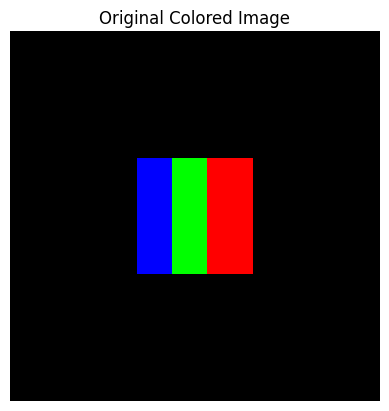

In [85]:
image = load_image(PATH, 64, 64)
F_rgb = np.zeros_like(image, dtype=complex)

plt.imshow(image, cmap='gray')
plt.title('Original Colored Image')
plt.axis('off')

plt.show()

Loss (25% coefficients): MSE = 0.000229
Loss (50% coefficients): MSE = 0.000037
Loss (75% coefficients): MSE = 0.000002
Loss (100% coefficients): MSE = 0.000000


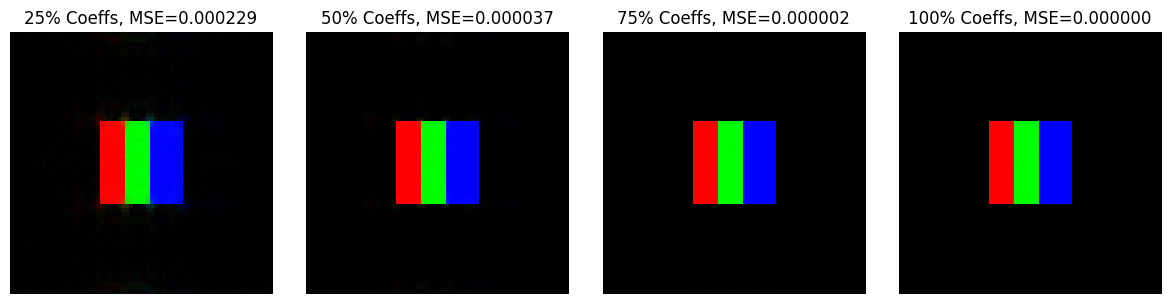

In [68]:
F_rgb = np.zeros_like(image, dtype=np.complex128)
for c in range(3):
    F_rgb[:, :, c] = dft2d(image[:, :, c])

fractions = [0.25, 0.5, 0.75, 1.0]
plt.figure(figsize=(12, 3))

for i, frac in enumerate(fractions):
    reconstructed_image = np.zeros_like(image)
    for c in range(3):
        compressed_F = compress_image(F_rgb[:, :, c], frac)
        reconstructed_image[:, :, c] = np.abs(idft2d(compressed_F))
    
    mse = mean_squared_error(image.flatten(), reconstructed_image.flatten())
    
    plt.subplot(1, len(fractions), i + 1)
    plt.imshow(np.clip(reconstructed_image, 0, 1))
    plt.title(f'{frac*100:.0f}% Coeffs, MSE={mse:.6f}')
    plt.axis('off')
    
    print(f"Loss ({frac*100:.0f}% coefficients): MSE = {mse:.6f}")

plt.tight_layout()
plt.show()